<a href="https://colab.research.google.com/github/cjstntjd/machine/blob/master/rmse_kaggle_0_115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive',force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"neopchi","key":"e9314cf98c2827f1e4630b82b2cd2508"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 22.1MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 62.0MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 62.4MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 31.0MB/s]


In [0]:
'''
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
생긴건 숫자지만 결국엔 10 단위로 나뉘어진 카테고리형 데이터 -> object로 바꿔주기

       Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
      Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
 두개는 같은 값을 갖는 변수 나중에 묶어서 파생변수 만들기

 Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

얘네 둘도 같은 카테고리에 속함 묶어서 계산
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

condition 값임 묶어서 계산


Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)

묶어서 계산 

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

이렇게 범주형 카테고리가 몇개 있음 묶어서 보고 퀄리티를 포함하는 측면이면 아가 데이터와 묶어서 생각하기 
BsmtQual: Evaluates the height of the basement
BsmtCond: Evaluates the general condition of the basement
BsmtExposure: Refers to walkout or garden level walls
전부 퀄리티 적인 측면을 요소로 하는 데이터 들임 하나로 합치면 데이터 양도 줄이고 하나의 파생변수로 기능할수있음

BsmtFinType1: Rating of basement finished area
BsmtFinType2: Rating of basement finished area (if multiple types)

포함

1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade
숫자형 데이터 임 

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
하나로 묶어서 생각할것 퀄리티 적인 측면의 데이터는 합산해도 상관 없음 

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

year의 대표값을 선정하는 알고리즘을 짜면 아까보다 더 좋은 성능을 기대할수 있음 


       '''


"\nMSSubClass: Identifies the type of dwelling involved in the sale.\t\n\n        20\t1-STORY 1946 & NEWER ALL STYLES\n        30\t1-STORY 1945 & OLDER\n        40\t1-STORY W/FINISHED ATTIC ALL AGES\n        45\t1-1/2 STORY - UNFINISHED ALL AGES\n        50\t1-1/2 STORY FINISHED ALL AGES\n        60\t2-STORY 1946 & NEWER\n        70\t2-STORY 1945 & OLDER\n        75\t2-1/2 STORY ALL AGES\n        80\tSPLIT OR MULTI-LEVEL\n        85\tSPLIT FOYER\n        90\tDUPLEX - ALL STYLES AND AGES\n       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n       150\t1-1/2 STORY PUD - ALL AGES\n       160\t2-STORY PUD - 1946 & NEWER\n       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n       \n생긴건 숫자지만 결국엔 10 단위로 나뉘어진 카테고리형 데이터 -> object로 바꿔주기\n\n       Street: Type of road access to property\n\n       Grvl\tGravel\t\n       Pave\tPaved\n       \t\n      Alley: Type of alley access to property\n\n       Grvl\tGravel\n       Pave\tPa

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
%matplotlib inline


from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,make_scorer

In [0]:
a = pd.read_csv('train.csv')
b = pd.read_csv('test.csv')

a.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
numcorr=a.corr()
Num=numcorr['SalePrice'].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("cyan", as_cmap=True)

corr = Num.style.background_gradient(cmap=cm)
corr
# overall quality, the living area, basement area, garage cars,garage area는 높은 상관관계를 가짐
# 전반적으로 퀄리티가 좋으면 일어나는 가격이 높아지는 주요한 원인
# fullBath 1stfloor surface 같은 품목도 사치적인 부분이라 높은 가격의 원인이 됨
# 0.5이상이면 일단 관계가 있나보다 하는 정도로 파악 하고 관찰 해보면 새로지은 연도가 가격의 원인이 됨을 알수 있음 

,SalePrice
SalePrice,1
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


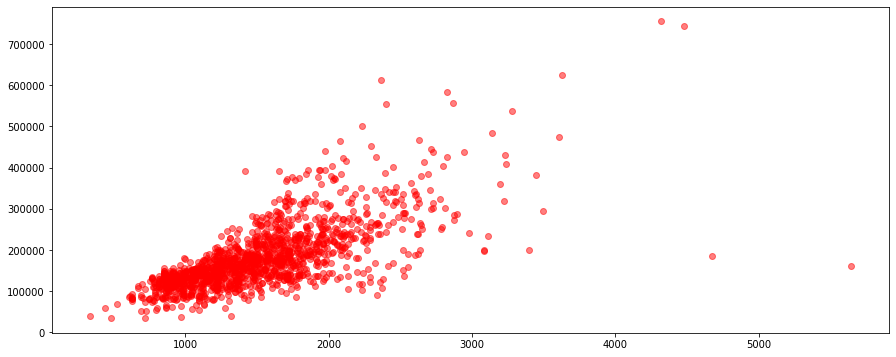

In [0]:
plt.figure(figsize=(15,6))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color='red', alpha=0.5)
plt.show()

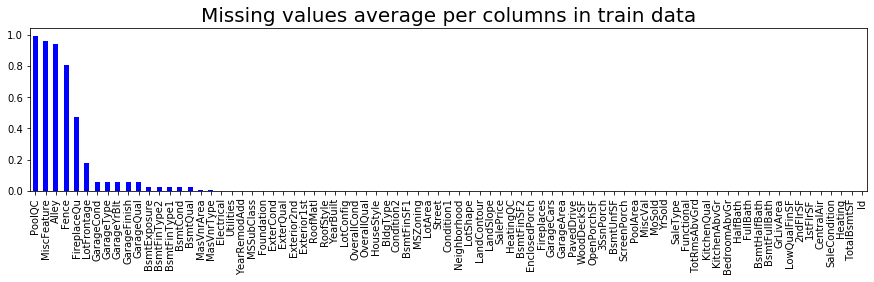

In [0]:
plt.subplots(1,0,figsize = (15,3))
a.isnull().mean().sort_values(ascending = False).plot.bar(color = 'blue')
plt.title('Missing values average per columns in train data', fontsize = 20)
plt.show()

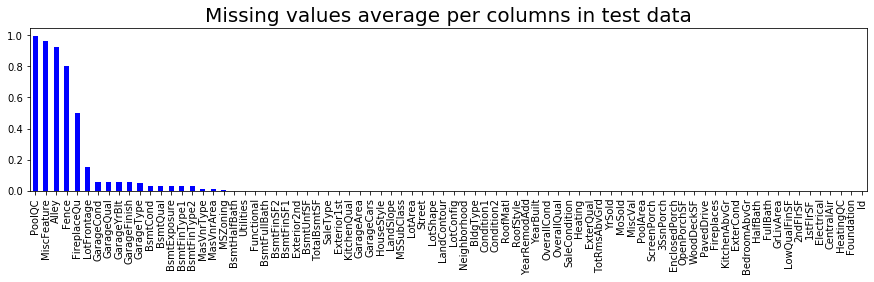

In [0]:
plt.subplots(1,0,figsize = (15,3))
b.isnull().mean().sort_values(ascending = False).plot.bar(color = 'blue')
plt.title('Missing values average per columns in test data', fontsize = 20)
plt.show()

In [0]:
na = a.shape[0]
nb = b.shape[0]
y_train = a['SalePrice'].to_frame()

c1 = pd.concat((a, b), sort=False).reset_index(drop=True)


c1.drop(['SalePrice'], axis=1, inplace=True)
c1.drop(['Id'], axis=1, inplace=True)
print("Total size is :",c1.shape)

Total size is : (2919, 79)


In [0]:
c=c1.dropna(thresh=len(c1)*0.9, axis=1)
print('We dropped ',c1.shape[1]-c.shape[1], ' features in the combined set')

#빈칸 많은것은 다 잘라내야 의미가 있음
#0.9 밑으로 적재된 데이터는 모두 잘라냄 

We dropped  6  features in the combined set


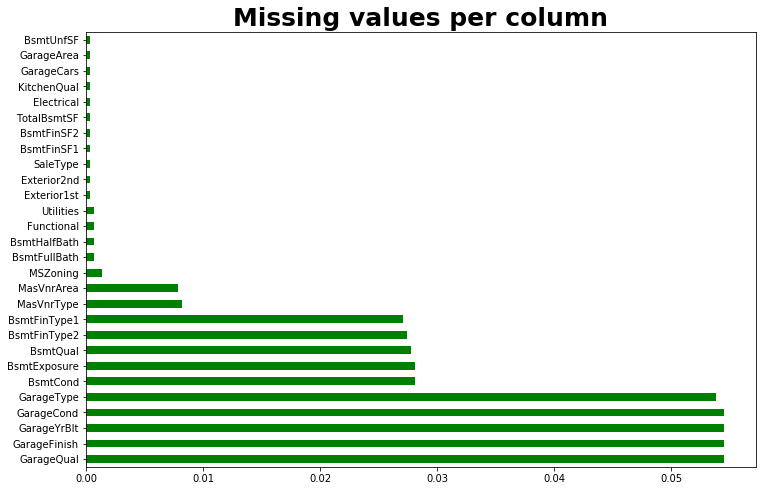

In [0]:
allna = (c.isnull().sum() / len(c))
allna = allna.drop(allna[allna == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
allna.plot.barh(color='green')
plt.title('Missing values per column', fontsize=25, weight='bold' )
plt.show()
#값이 없는 애들을 찾아서 채워줘야함 아까 많은 애들은 전부 잘라 냈고 적은 애들 기준으로 부족한건 채워줌 

In [0]:
print('90%넘는거 잘라내고 난 나머지 : ',c.shape)

90%넘는거 잘라내고 난 나머지 :  (2919, 73)


In [0]:
#빈칸인 애들 전부 찾기
NA=c[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt','BsmtFinType2','BsmtFinType1','BsmtCond', 'BsmtQual','BsmtExposure', 'MasVnrArea','MasVnrType','Electrical','MSZoning','BsmtFullBath','BsmtHalfBath','Utilities','Functional','Exterior1st','BsmtUnfSF','Exterior2nd','TotalBsmtSF','GarageArea','GarageCars','KitchenQual','BsmtFinSF2','BsmtFinSF1','SaleType']]
print(len(NA))

2919


In [0]:
#범주형과 범주형이 아닌 데이터들로 나눠서 처리
NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')

print('We have :',NAcat.shape[1],'categorical miss val')
print('We have :',NAnum.shape[1],'numerical miss val')

We have : 18 categorical miss val
We have : 10 numerical miss val


In [0]:
NAnum.head()

,GarageYrBlt,MasVnrArea,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF,GarageArea,GarageCars,BsmtFinSF2,BsmtFinSF1
0,2003.0,196.0,1.0,0.0,150.0,856.0,548.0,2.0,0.0,706.0
1,1976.0,0.0,0.0,1.0,284.0,1262.0,460.0,2.0,0.0,978.0
2,2001.0,162.0,1.0,0.0,434.0,920.0,608.0,2.0,0.0,486.0
3,1998.0,0.0,1.0,0.0,540.0,756.0,642.0,3.0,0.0,216.0
4,2000.0,350.0,1.0,0.0,490.0,1145.0,836.0,3.0,0.0,655.0


In [0]:
#MasVnrArea = 석조 바닥을 의미함 없는 값은 0 을 넣어도 무방 하므로 fillna 에 0
c['MasVnrArea']=c['MasVnrArea'].fillna(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
c['GarageYrBlt']=c["GarageYrBlt"].fillna(1980)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 73 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2895 non-null object
MasVnrArea       2919 non

In [0]:
NAcat.head()

,GarageType,GarageFinish,GarageQual,GarageCond,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtExposure,MasVnrType,Electrical,MSZoning,Utilities,Functional,Exterior1st,Exterior2nd,KitchenQual,SaleType
0,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,No,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD
1,Attchd,RFn,TA,TA,Unf,ALQ,TA,Gd,Gd,None,SBrkr,RL,AllPub,Typ,MetalSd,MetalSd,TA,WD
2,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,Mn,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD
3,Detchd,Unf,TA,TA,Unf,ALQ,Gd,TA,No,None,SBrkr,RL,AllPub,Typ,Wd Sdng,Wd Shng,Gd,WD
4,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,Av,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD


In [0]:
NAcat1= NAcat.isnull().sum().to_frame().sort_values(by=[0]).T
NAcat1
#빈칸 개수 세보고 적절한 값을 찾아보기 

,SaleType,Exterior2nd,Exterior1st,KitchenQual,Electrical,Functional,Utilities,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtExposure,BsmtCond,GarageType,GarageCond,GarageQual,GarageFinish
0,1,1,1,1,1,2,2,4,24,79,80,81,82,82,157,159,159,159


In [0]:
c['Electrical']=c['Electrical'].fillna(method='ffill')
c['SaleType']=c['SaleType'].fillna(method='ffill')
c['KitchenQual']=c['KitchenQual'].fillna(method='ffill')
c['Exterior1st']=c['Exterior1st'].fillna(method='ffill')
c['Exterior2nd']=c['Exterior2nd'].fillna(method='ffill')
c['Functional']=c['Functional'].fillna(method='ffill')
c['Utilities']=c['Utilities'].fillna(method='ffill')
c['MSZoning']=c['MSZoning'].fillna(method='ffill')
#foward fill 로 데이터 채우기 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 73 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2895 non-null object
MasVnrArea       2919 non

In [0]:
NAcols=c.columns
for col in NAcols:
    if c[col].dtype == "object":
        c[col] = c[col].fillna("Miss")
#범주형에는 miss를 넣고 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
for col in NAcols:
    if c[col].dtype != "object":
        c[col]= c[col].fillna(0)
#빈칸에는 0 을 넣자

#차고연도 처럼 연속된 숫자인데 차고가 없을수 있음 해당 값은 0이 들어가야 맞고 
#풀 욕실의 유무와 같은 피쳐 들도 결국에는 없는것이므로 miss를 넣어서 빈칸을 채우는 것이 맞음 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
c.isnull().sum().sort_values(ascending=False).head()
#모든 칸을 다 채움

SaleCondition    0
TotalBsmtSF      0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

In [0]:
# 두개로 나눠진 피처는 하나로 합치는것이 좋음
#파생변수를 많이 만든다고 해서 좋은것이 아님 
#적절한 데이터를 선별해서 넣어두고 영향을 갖는것만 선별하는것이 옳음
c['TotalArea'] = c['TotalBsmtSF'] + c['1stFlrSF'] + c['2ndFlrSF'] + c['GrLivArea'] +c['GarageArea']

c['Bathrooms'] = c['FullBath'] + c['HalfBath']*0.5 

c['Year average']= (c['YearRemodAdd']+c['YearBuilt'])/2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [0]:
#실제로 범주형인 애들을 int에서 str으로 바꿈 
#월은 실제로 12월이 범주임 
c['MoSold'] = c['MoSold'].astype(str)
c['MSSubClass'] = c['MSSubClass'].apply(str)
c['YrSold'] = c['YrSold'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
cb=pd.get_dummies(c)
print("the shape of the original dataset",c.shape)
print("the shape of the encoded dataset",cb.shape)
print("We have ",cb.shape[1]- c.shape[1], 'new encoded features')

the shape of the original dataset (2919, 76)
the shape of the encoded dataset (2919, 312)
We have  236 new encoded features


In [0]:
#왜도 값을 보정해 줘야 함 -> 로그를 취해주면 좋음
print("Skewness before log transform: ", a['GrLivArea'].skew())
print("Kurtosis before log transform: ", a['GrLivArea'].kurt())

Skewness before log transform:  1.3665603560164552
Kurtosis before log transform:  4.895120580693174


In [0]:
from scipy.stats import skew

numeric_feats = c.dtypes[c.dtypes != "object"].index

skewed_feats = c[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

c[skewed_feats] = np.log1p(c[skewed_feats])

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
print("Skewness after log transform: ", c['GrLivArea'].skew())
print("Kurtosis after log transform: ", c['GrLivArea'].kurt())

Skewness after log transform:  0.013194362973261277
Kurtosis after log transform:  0.21187007351190523


In [0]:
Train = cb[:na]
Test = cb[na:] 

In [0]:
train=Train[(Train['GrLivArea'] < 4600) & (Train['MasVnrArea'] < 1500)]

print('We removed ',Train.shape[0]- train.shape[0],'outliers')

We removed  3 outliers


In [0]:
target=a[['SalePrice']]
target.loc[1298]

SalePrice    160000
Name: 1298, dtype: int64

In [0]:
target.loc[523]

SalePrice    184750
Name: 523, dtype: int64

In [0]:
pos = [1298,523, 297]
target.drop(target.index[pos], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
print('We make sure that both train and target sets have the same row number after removing the outliers:')
print( 'Train: ',train.shape[0], 'rows')
print('Target:', target.shape[0],'rows')

We make sure that both train and target sets have the same row number after removing the outliers:
Train:  1457 rows
Target: 1457 rows


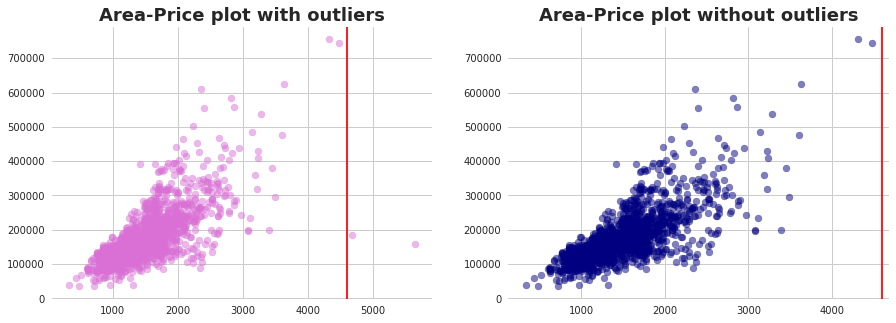

In [0]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('orchid'), alpha=0.5)
plt.title('Area-Price plot with outliers',weight='bold', fontsize=18)
plt.axvline(x=4600, color='r', linestyle='-')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.scatter(x=train['GrLivArea'], y=target['SalePrice'], color='navy', alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Area-Price plot without outliers',weight='bold', fontsize=18)
plt.show()

In [0]:
print("Skewness before log transform: ", target['SalePrice'].skew())
print("Kurtosis before log transform: ",target['SalePrice'].kurt())

Skewness before log transform:  1.8829247000823222
Kurtosis before log transform:  6.527120338179705


In [0]:
target["SalePrice"] = np.log1p(target["SalePrice"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


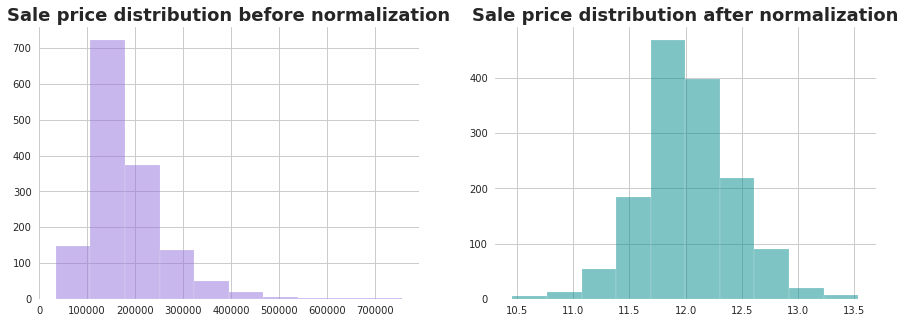

In [0]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.hist(a.SalePrice, bins=10, color='mediumpurple',alpha=0.5)
plt.title('Sale price distribution before normalization',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.hist(target.SalePrice, bins=10, color='darkcyan',alpha=0.5)
plt.title('Sale price distribution after normalization',weight='bold', fontsize=18)
plt.show()

In [0]:
print("Skewness after log transform: ", target['SalePrice'].skew())
print("Kurtosis after log transform: ",target['SalePrice'].kurt())

Skewness after log transform:  0.12299462625720967
Kurtosis after log transform:  0.8062416349541652


In [0]:
x=train
y=np.array(target)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .33, random_state=0)

In [0]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform "x_train"
x_train = scaler.fit_transform(x_train)
# transform "x_test"
x_test = scaler.transform(x_test)
#Transform the test set
X_test= scaler.transform(Test)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

lreg=LinearRegression()
MSEs=ms.cross_val_score(lreg, x, y, scoring='neg_mean_squared_error', cv=5)
meanMSE=np.mean(MSEs)
print(meanMSE)
print('RMSE = '+str(math.sqrt(-meanMSE)))

-843.1493313448473
RMSE = 29.037033790400272


In [0]:
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(x_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved with Alpha=14 is: ",math.sqrt(-ridge_reg.best_score_))

The best value of Alpha is:  {'alpha': 19}
The best score achieved with Alpha=14 is:  0.11466410440453538


In [0]:
ridge_mod=Ridge(alpha=19)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test))))   

Root Mean Square Error train = 0.0942565848310746
Root Mean Square Error test = 0.11416603124671765


In [0]:
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}

lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(x_train,y_train)

print('The best value of Alpha is: ',lasso_reg.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.235782260552761, tolerance: 0.014337348695729273
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1548082543359035, tolerance: 0.014098270889750604
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4305034915344774, tolerance: 0.013936688230136017
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2

The best value of Alpha is:  {'alpha': 0.0009}


In [0]:
lasso_mod=Lasso(alpha=0.0009)
lasso_mod.fit(x_train,y_train)
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_lasso_test))))

Root Mean Square Error train = 0.09924012932671498
Root Mean Square Error test = 0.11069063861528478


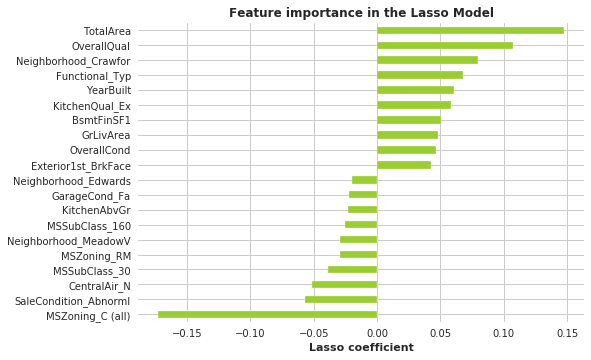

In [0]:
coefs = pd.Series(lasso_mod.coef_, index = x.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

In [0]:
print("Lasso kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")

Lasso kept  88 important features and dropped the other  224  features


In [0]:
from sklearn.linear_model import ElasticNetCV

alphas = [10,1,0.1,0.01,0.001,0.002,0.003,0.004,0.005,0.00054255]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred))))
print(elastic_cv.alpha_)

Root Mean Square Error test = 0.11412946425369974
0.003


In [0]:
from sklearn.linear_model import ElasticNetCV

alphas = [0.003]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred))))
print(elastic_cv.alpha_)

Root Mean Square Error test = 0.11412946425369974
0.003


In [0]:
'''from xgboost.sklearn import XGBRegressor

xg_reg = XGBRegressor()
xgparam_grid= {'learning_rate' : [0.01],'n_estimators':[2000, 3460, 4000],
                                     'max_depth':[3], 'min_child_weight':[0,3,5],
                                     'colsample_bytree':[0.5,0.7],
                                     'reg_alpha':[0.0001,0.001,0.01,0.1,10,100],
                                    'reg_lambda':[1,0.01,0.8,0.001,0.0001]}

xg_grid = GridSearchCV.GridSearchCV(xg_reg, param_grid=xgparam_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xg_grid.fit(x_train,y_train)
print(xg_grid.best_estimator_)
print(xg_grid.best_score_)'''

"from xgboost.sklearn import XGBRegressor\n\nxg_reg = XGBRegressor()\nxgparam_grid= {'learning_rate' : [0.01],'n_estimators':[2000, 3460, 4000],\n                                     'max_depth':[3], 'min_child_weight':[0,3,5],\n                                     'colsample_bytree':[0.5,0.7],\n                                     'reg_alpha':[0.0001,0.001,0.01,0.1,10,100],\n                                    'reg_lambda':[1,0.01,0.8,0.001,0.0001]}\n\nxg_grid = GridSearchCV.GridSearchCV(xg_reg, param_grid=xgparam_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)\nxg_grid.fit(x_train,y_train)\nprint(xg_grid.best_estimator_)\nprint(xg_grid.best_score_)"

In [0]:
from xgboost.sklearn import XGBRegressor
xgb= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=4000,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.0001, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgmod=xgb.fit(x_train,y_train)
xg_pred=xgmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, xg_pred))))

Root Mean Square Error test = 0.11613085302161598


In [0]:
from sklearn.ensemble import VotingRegressor

vote_mod = VotingRegressor([('Ridge', ridge_mod), ('Lasso', lasso_mod), ('Elastic', elastic_cv), 
                            ('XGBRegressor', xgb)])
vote= vote_mod.fit(x_train, y_train.ravel())
vote_pred=vote.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, vote_pred))))

Root Mean Square Error test = 0.10913969846952667


In [0]:
from mlxtend.regressor import StackingRegressor


stregr = StackingRegressor(regressors=[elastic_cv,ridge_mod, lasso_mod, vote_mod], 
                           meta_regressor=xgb, use_features_in_secondary=True
                          )

stack_mod=stregr.fit(x_train, y_train.ravel())
stacking_pred=stack_mod.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, stacking_pred))))

Root Mean Square Error test = 0.11301226275302864


In [0]:
final_test=(0.2*vote_pred+0.6*stacking_pred+ 0.2*y_lasso_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, final_test))))

Root Mean Square Error test = 0.10948652905830386


In [0]:
#VotingRegressor to predict the final Test
vote_test = vote_mod.predict(X_test)
final1=np.expm1(vote_test)

#StackingRegressor to predict the final Test
stack_test = stregr.predict(X_test)
final2=np.expm1(stack_test)

#LassoRegressor to predict the final Test
lasso_test = lasso_mod.predict(X_test)
final3=np.expm1(lasso_test)

In [0]:
#Submission of the results predicted by the average of Voting/Stacking/Lasso
final=(0.2*final1+0.6*final2+0.2*final3)

final_submission = pd.DataFrame({
        "Id": b["Id"],
        "SalePrice": final
    })
final_submission.to_csv("final_submission2.csv", index=False)
final_submission.head()

,Id,SalePrice
0,1461,121198.407530
1,1462,158872.007980
2,1463,181153.589277
3,1464,195265.268864
4,1465,190070.376947


In [0]:
!ls

data_description.txt   kaggle.json  sample_submission.csv  train.csv
final_submission2.csv  sample_data  test.csv


In [0]:
files.download('final_submission2.csv')